In [74]:
import pandas as pd
df=pd.read_csv('credit_data.csv')
df.head()

,id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,2,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,3,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,4,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,5,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       1000 non-null   int64 
 1   status                   1000 non-null   object
 2   duration                 1000 non-null   int64 
 3   credit_history           1000 non-null   object
 4   purpose                  1000 non-null   object
 5   amount                   1000 non-null   int64 
 6   savings                  1000 non-null   object
 7   employment_duration      1000 non-null   object
 8   installment_rate         1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

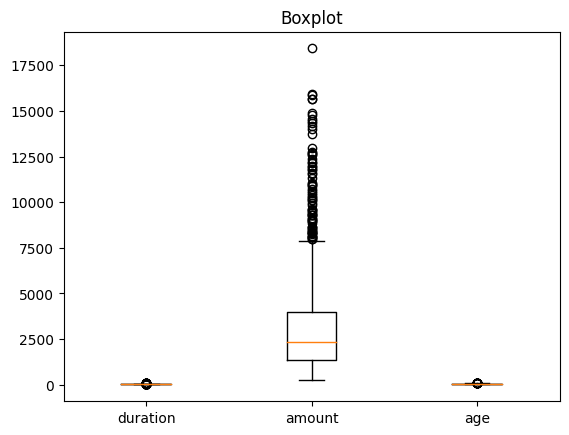

In [76]:
mumeric_cols = ['duration','amount','age']
numeric_cols_df = df[mumeric_cols]


import matplotlib.pyplot as plt
plt.boxplot(numeric_cols_df)
plt.title('Boxplot')
plt.xticks([1,2,3],['duration','amount','age'])
plt.show()





In [77]:
import numpy as np
amount_qtls = np.quantile(df['amount'],[0.25,0.75])
iqr = amount_qtls[1]-amount_qtls[0]
upper_bound = amount_qtls[1]+(1.5*iqr)
lower_bound = amount_qtls[0]-(1.5*iqr)
amount_outliers = [x for x in df['amount'] if x<lower_bound or x>upper_bound]
len(amount_outliers)

72

In [78]:
df_filtered = df[(df['amount']<=upper_bound) & (df['amount']>=lower_bound)]
df_filtered.shape

(928, 21)

In [88]:
y = df_filtered['credit_risk']
x = df_filtered.drop(columns=['credit_risk','id'],axis=1)

In [89]:
cols = ['status','credit_history','purpose','savings','employment_duration','installment_rate','other_debtors','present_residence','property','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker']
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()
for col in cols:
    x[col]=labels.fit_transform(x[col])

In [97]:
y = labels.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [98]:
import tensorflow as tf
nn_model = tf.keras.Sequential()
nn_model.add(tf.keras.layers.Dense(units=3,activation='relu',input_dim=19))
nn_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
nn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','mse'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x_scaled,
    y,
    stratify=y
)


In [101]:
nn_model.fit(x_train,y_train,epochs=5)

Epoch 1/5
22/22 [==============================] - 0s 842us/step - loss: 0.0000e+00 - accuracy: 0.2816 - mse: 0.6999
Epoch 2/5
22/22 [==============================] - 0s 845us/step - loss: 0.0000e+00 - accuracy: 0.2816 - mse: 0.7002
Epoch 3/5
22/22 [==============================] - 0s 822us/step - loss: 0.0000e+00 - accuracy: 0.2816 - mse: 0.7006
Epoch 4/5
22/22 [==============================] - 0s 900us/step - loss: 0.0000e+00 - accuracy: 0.2816 - mse: 0.7008
Epoch 5/5
22/22 [==============================] - 0s 852us/step - loss: 0.0000e+00 - accuracy: 0.2816 - mse: 0.7011


In [103]:
print(nn_model.evaluate(x_train,y_train))

22/22 [==============================] - 0s 744us/step - loss: 0.0000e+00 - accuracy: 0.2816 - mse: 0.7012
[0.0, 0.2816092073917389, 0.7012419700622559]
